# Image Analysis with Python
## Session 2: Scientific Python Primer

__Toby Hodges__  
[toby.hodges@embl.de](mailto:toby.hodges@embl.de)  
[bio-it.embl.de](https://bio-it.embl.de)

In this session:
- Give beginners some experience of working with specialised modules
- Learn to work with `numpy` arrays
- Get familiar with some of the other module libraries commonly used in image processing/analysis
- See how this relates to what Tobias taught last week

### Part 1: Arrays & `numpy`

In [6]:
# A reminder about import statements
import numpy as np

In [15]:
# The numpy.ndarray object
numbers = list(range(8))
print(numbers)
numarray = np.array(numbers)
print(numarray)
print(type(numarray))

[0, 1, 2, 3, 4, 5, 6, 7]
[0 1 2 3 4 5 6 7]
<class 'numpy.ndarray'>


In [25]:
print(numarray) # can be considered a 'row vector'
column = np.array([[10],
                   [11],
                   [12],
                   [13],
                   [14],
                   [15]]) # a 'column vector'
print(column)
print(numarray.shape)
print(column.shape)

[0 1 2 3 4 5 6 7]
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]]
(8,)
(6, 1)


In [14]:
# ndarray stands for "n-dimensional array"
array3d = np.array(
    [
        [[0, 1, 2], [3, 4, 5]],
        [[6, 7, 8], [9, 0, 1]],
        [[2, 3, 4], [5, 6, 7]]
    ])
print(array3d)
print(np.shape(array3d)) # or print(array3d.shape)

[[[0 1 2]
  [3 4 5]]

 [[6 7 8]
  [9 0 1]]

 [[2 3 4]
  [5 6 7]]]
(3, 2, 3)


Monochromatic image files can be considered as 2D numeric arrays, where the value at each position corresponds to the intensity of the associated pixel in the image.

<img alt="A section of an image file shown as an array of intensity values"  src="images/figC.png">

Often, you will have intensity information for more than one colour. These arrays for different "channels", can be treated as layers in an additional dimension in a single array. E.g. an RGB image will have three 2D arrays, one for each of the colours. Image arrays may become 4-dimension, when 'Z-stack' images, of multiple layers in space, are considered, and yet another dimension may also be added when time-series images (i.e. video) are captured.

But wait! Couldn't we achieve the same thing with the `list` objects that are built into Python? What's the advantage of using arrays for this? And, while we're on the subject, what the heck is Numpy anyway?

Numpy is a "numeric Python" library, designed to work with numeric data. Where the Python Standard Library contains (lots of) general-purpose functionality for writing Python scripts, numpy was developed with specialist numeric applications in mind. As such, many of the functions and objects that Numpy contains are much better-suited to the kind of operations that you will regularly perform while working with image data.

For example, numpy arrays take up much less RAM than an equivalent `list` object, and mathematical operations on arrays tend to work much faster than for a standard `list`.

You may not care about these things now, and I admit that they're not particularly exciting. There are other, more practical advantages to using arrays though...

To demonstrate, let's keep looking at some more simple arrays. __But first!__ an exercise to make sure that everyone's awake.

##### Exercise 1

Fill in the blanks in the code below, to triple every value in the list, `list2d`.

In [34]:
list2d =[[0.1, 3.8, 8.9],
         [4.4, 9.0, 5.2],
         [3.1, 8.4, 5.2]]
print(list2d)

[[0.1, 3.8, 8.9], [4.4, 9.0, 5.2], [3.1, 8.4, 5.2]]


In [28]:
pos    = ___
subpos = ___
for sublist ___ list2d:
    ___ number in ___:
        list2d[pos][subpos] = ___ ___ 3
        ___ += 1
    subpos = 0
    ___ ___ ___

SyntaxError: invalid syntax (<ipython-input-28-d4aeaf2b4f18>, line 3)

In [39]:
# Optional: ask Toby to show you how to achieve the same thing with enumerate()

Now, let's look at how to achieve the same thing with an array.

In [41]:
array2d = np.array([[0.1, 3.8, 8.9],
                    [4.4, 9.0, 5.2],
                    [3.1, 8.4, 5.2]])
print(array2d)
print(array2d * 3)

[[0.1 3.8 8.9]
 [4.4 9.  5.2]
 [3.1 8.4 5.2]]
[[ 0.3 11.4 26.7]
 [13.2 27.  15.6]
 [ 9.3 25.2 15.6]]


Much easier! You can do lots of mathematical operations, element-wise, on arrays just as easily. And matrix arithmetic too! (_Disclaimer: I am not a mathematician._)

In [46]:
mat = np.matrix(array2d)
dir(mat)

['A',
 'A1',
 'H',
 'I',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '_

In [51]:
print(mat.T)

another_mat = np.matrix('1 2 3; 4 5 6; 7 8 9') # this is an alternative syntax for making a matrix
print(mat * another_mat) # matrix multiplication

[[0.1 4.4 3.1]
 [3.8 9.  8.4]
 [8.9 5.2 5.2]]
[[ 77.6  90.4 103.2]
 [ 76.8  95.4 114. ]
 [ 73.1  89.8 106.5]]


In [58]:
# back to arrays
print(np.array(['one', 2, 3.0])) # arrays want to contain only one type of data
print(array2d)
print(array2d.dtype) # show the datatype of the array

['one' '2' '3.0']
[[0.1 3.8 8.9]
 [4.4 9.  5.2]
 [3.1 8.4 5.2]]
float64


What is this `float64`? Floating point numbers (numbers represented with decimal places) can be stored with varying levels of precision. A 64-bit number is more precise than a 32-bit number, which is more precise than a 16-bit number, and so on. The same applies to integers. On a computer, integers can only exist between a limited range, which depends on how many bits they are stored in. The exact range depends on whether the integer is 'signed' (includes information about whether the value is above or below zero) or 'unsigned' (positive or zero values only).

The datatype of your array determines how precise your values are, and how much memory the array is using up in the background. You also need to be aware of what happens with integer values when you exceed their limits in either direction...

In [63]:
zeros = np.zeros_like(array2d, dtype='uint8')
print(zeros)
print(zeros-1) # !!! This will become relevant in sessions to come...

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[255 255 255]
 [255 255 255]
 [255 255 255]]


That `np.zeros_like()` function is pretty useful. We'll come back to it later. For now, let's have a look at a few other functions that Numpy provides for creating arrays.

In [71]:
np.arange(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [81]:
range_array = np.arange(25)
range_array.shape = (5,5)
print(range_array)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [83]:
np.ones((8,8), dtype='int16')

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=int16)

In [85]:
np.random.normal(size=(4,4))

array([[-0.700269  , -0.84020952, -0.52578493,  1.38062608],
       [-1.11861924,  0.21204952,  0.10856176,  0.25545649],
       [ 0.32437706,  1.19837232,  1.52731874, -0.2691619 ],
       [-1.47856194, -1.08825932, -0.04103357, -0.17722276]])

In [89]:
np.linspace(0, 10, 10, dtype='float16')

array([ 0.   ,  1.111,  2.223,  3.334,  4.445,  5.555,  6.668,  7.777,
        8.89 , 10.   ], dtype=float16)

##### Exercise 2

You will need to look at the documentation to do complete of the steps below... Use `help(thing)` or `thing?` to see the help page for an object/function/module called `thing`. `dir(thing)` shows you a list of all the attributes and methods available for `thing`. You can also find the Numpy documentation online at https://docs.scipy.org/doc/numpy-1.14.2/.

a) create a random array of 12 integers between 0 and 1000, store it as a variable (you can choose the name)  
b) change the data in the array to 32-bit floating point numbers  
c) divide the data in the array by 3.3  
d) raise every element in the array to the power of 2  

#### Part 2: Array Indexing

Select parts of an array in the same way as you might do with a standard `list`.

In [90]:
print(array2d)
array2d[0]

[[0.1 3.8 8.9]
 [4.4 9.  5.2]
 [3.1 8.4 5.2]]


array([0.1, 3.8, 8.9])

In [91]:
array2d[-1]

array([3.1, 8.4, 5.2])

In [94]:
array2d[1][-1]

5.2

In [96]:
array2d[1:]

array([[4.4, 9. , 5.2],
       [3.1, 8.4, 5.2]])

In [97]:
array2d[1:][:1] # a little confusing...

array([[4.4, 9. , 5.2]])

Ok... But the real power comes from 'masking', or 'Boolean indexing'. This is where that `zeros_like()` function becomes relevant.

In [102]:
big_random_2darray = np.random.randint(100, size=(16,16))
print(big_random_2darray)

[[80 47  7 29 78  7 77 23 47 44 47 24 14 28 10 15]
 [48  3 68 31  8 51 56 28 33  9 11 74 72 55 15  6]
 [64 68 83 84 56  7 72 56 25  6 23 84 78 93 95 26]
 [87 89 79 14 29  8 41 84 31 11 13 65  1 78  3 15]
 [51 85 31 25 87 97 33 25 81 41  1 57 46 84 25 11]
 [55 10 78 12 89 47  9 75 59 78 10  3 86 34 50 33]
 [86 23 71 88 36 80  3 39  9 23  4 38 97 73 62 24]
 [42 73 56 77 81 93 11 17 56  4 33 73 14  4 94 26]
 [ 5 94 69 36  7 66 18 54  1 50 65 18 41 59 45 62]
 [79 46 91 26 10 55 86 73 51 61 72 96 79 75 26  5]
 [85 48 56 67 12 22 24 45  1 43 90 62 17 81 56 10]
 [45 55 58 96 50 90 63 86 30 75 35 27 95 82 64 30]
 [61 82 70 94 95  9  3 89 73 41 91 81 26 50 87 27]
 [42 30 51 42 51 25 32 17 99  8 25 68 50 80 94 22]
 [ 5 14 17 54 68 34 95 36 56 62 30 92 40 84 86 13]
 [18 68 69 29 90 48 87 76 17  2 60 48 60 91 34 58]]


In [117]:
mask = np.zeros_like(big_random_2darray, dtype="Bool")
print(mask.shape)

(16, 16)


In [118]:
print(big_random_2darray[mask])

[]


In [119]:
alternating = np.arange(0, 16, 2)
print(alternating)
mask[alternating] = True
print(mask)

[ 0  2  4  6  8 10 12 14]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False False False False
  False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False False False False
  False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False False False False
  False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False False False False
  False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False False Fal

In [121]:
print(big_random_2darray[mask])

[80 47  7 29 78  7 77 23 47 44 47 24 14 28 10 15 64 68 83 84 56  7 72 56
 25  6 23 84 78 93 95 26 51 85 31 25 87 97 33 25 81 41  1 57 46 84 25 11
 86 23 71 88 36 80  3 39  9 23  4 38 97 73 62 24  5 94 69 36  7 66 18 54
  1 50 65 18 41 59 45 62 85 48 56 67 12 22 24 45  1 43 90 62 17 81 56 10
 61 82 70 94 95  9  3 89 73 41 91 81 26 50 87 27  5 14 17 54 68 34 95 36
 56 62 30 92 40 84 86 13]


That example was pretty contrived, so let's look at something more realistic, masking some background value.

In [126]:
print(array2d)
array2d < 4.0

[[0.1 3.8 8.9]
 [4.4 9.  5.2]
 [3.1 8.4 5.2]]


array([[ True,  True, False],
       [False, False, False],
       [ True, False, False]])

In [129]:
below_10 = big_random_2darray < 10
print(big_random_2darray[below_10])
big_random_2darray[below_10] = 0
print(big_random_2darray)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[80 47  0 29 78  0 77 23 47 44 47 24 14 28 10 15]
 [48  0 68 31  0 51 56 28 33  0 11 74 72 55 15  0]
 [64 68 83 84 56  0 72 56 25  0 23 84 78 93 95 26]
 [87 89 79 14 29  0 41 84 31 11 13 65  0 78  0 15]
 [51 85 31 25 87 97 33 25 81 41  0 57 46 84 25 11]
 [55 10 78 12 89 47  0 75 59 78 10  0 86 34 50 33]
 [86 23 71 88 36 80  0 39  0 23  0 38 97 73 62 24]
 [42 73 56 77 81 93 11 17 56  0 33 73 14  0 94 26]
 [ 0 94 69 36  0 66 18 54  0 50 65 18 41 59 45 62]
 [79 46 91 26 10 55 86 73 51 61 72 96 79 75 26  0]
 [85 48 56 67 12 22 24 45  0 43 90 62 17 81 56 10]
 [45 55 58 96 50 90 63 86 30 75 35 27 95 82 64 30]
 [61 82 70 94 95  0  0 89 73 41 91 81 26 50 87 27]
 [42 30 51 42 51 25 32 17 99  0 25 68 50 80 94 22]
 [ 0 14 17 54 68 34 95 36 56 62 30 92 40 84 86 13]
 [18 68 69 29 90 48 87 76 17  0 60 48 60 91 34 58]]


#### Part 3: Visualising arrays with `matplotlib`

Ok, now that we're familiar with arrays and Numpy, it's time to look at a bit of plotting. Despite the fact that images can be thought of as numbers, they're still easist to understand when visualised.

In [131]:
# this is only necessary when working in a Jupyter notebook
%matplotlib inline

/Users/hodges/anaconda/envs/Py36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [132]:
import matplotlib.pyplot as plt

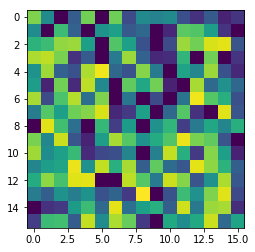

In [135]:
plt.imshow(big_random_2darray)

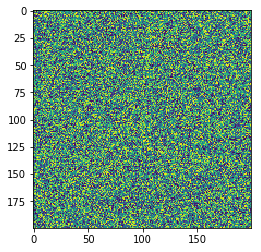

In [136]:
bigger_random_2darray = np.random.randint(100, size=(200,200))
plt.imshow(bigger_random_2darray)

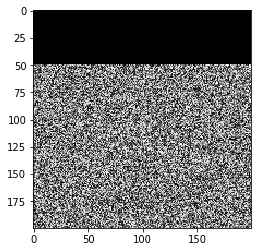

In [142]:
bigger_random_2darray[0:50] = 0
plt.imshow(bigger_random_2darray, cmap='gray')

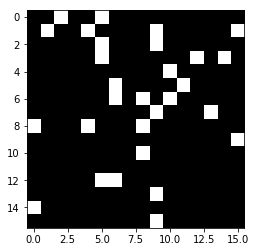

In [144]:
plt.imshow(big_random_2darray < 10, cmap='gray')